# Customer Churn Prediction

## Introduction

- Customer churn or attrition is the proportion of customers who stop using a company's products or services. Preventing customer churn is a key element of modern businesses because of the improved performance it offers. 

### Why Predict Customer Churn

 - Growing a company requires investment in time, effort, and money to acquire customers. Whenever a customer leaves, it represents a significant loss in investment.

 - According to marketing statistics, customer acquisiton costs are almost five times the retention costs. Therefore, predicting the possiblity of customers leaving and taking actions to ensure they stay, offers huge savings to a company.

 - Predicting churn rates helps businesses to identify operational gaps/opportunities leading to enhancement of business operations and consequently increased revenue. 

 - Churn rate influences customer lifetime value and therefore critical in the longterm survival of any company.

The benefits of predicting customer churn are many and cannot be overstated, most impactful to the company are the actions that follow.

### Next step

- Identifying the customers that will churn is just the first step, being strategic to identify the exact actions to implement to avoid the customer churn is the main goal. 

- Though the process may seem complex, it can easily be guided with in-depth data exploration and analysis.

### Model Objective

- The objective of this model is to identify the customers with the highest possibility of churning so as to develop better retention strategies, and to roll out operational practices that will keep customers from walking out the door.

- The project builds a customer churn prediction model using data from a telecommunications company. 

## Data Specifications

**The data set includes information about:**

- Customers who left within the last month – the column is called Churn.

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

- Demographic info about customers – gender, age range, and if they have partners and dependents.

Below is a description of the first ten attributes in the data. In total, the data has 21 attributes.

1. **Customer ID** - Unique customer identification.
2. **Gender** - Whether the customer is a male or a female.
3. **Senior Citizen** - Whether the customer is a senior citizen or not (1, 0).
4. **Partner** - Whether the customer has a partner or not (Yes, No).
5. **Dependents** - Whether the customer has dependents or not (Yes, No).
6. **Tenure** - Number of months the customer has stayed with the company.
7. **Phone Service** - Whether the customer has a phone service or not (Yes, No).
8. **Multiple Lines** - Whether the customer has multiple lines or not (Yes, No, No phone service).
9. **Internet Service** - Customer’s internet service provider (DSL, Fiber optic, No).
10. **Online Security** - Whether the customer has online security or not (Yes, No, No internet service).

## Importing Basic Libraries

In [112]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
sns.set(style = 'white')

## Loading Data

In [38]:
df = pd.read_csv('C:/Data Science Projects/Projects/Customer Churn Prediction/Telcoms-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
# Getting an overview of the data i.e. column names, data types, and null entries.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Using the above infomation, we can see discrepancies in the data type of some variables.**

- For example, SeniorCitizen has values 0 or 1 but is presented as numerical (int64).

- Also, TotalCharges should be numerical but it is presented as categorical.

We will begin by solving the data type discrepancy problem.

## Data Cleaning

### Data type checking function

*Lets create a function for identifying data type discrepancies in data.*

  **function name**
    
 > *dataType_Check(dataframe, cat_th=10)*
        
  **Parameters**
    
 > *dataframe:* dataframe name
   
 > *cat_th:* categories threshold (int, default: 10, optional)<br>
             Highest number of unique values in a categorical column

  **Returns**
    
 > *cat_cols:* list of categorical columns
   
 > *num_cols:* list of numerical columns
   
 > *cat_but_num:* list of numerical columns presented as categorical
   
 > *num_but_cat:* list of categorical columns presented as numerical                
     
  **Example**
    
 > import seaborn as sns
   
 > df = sns.load_dataset("iris")
 
 > print(**dataType_Check(df)**)

In [40]:
def dataType_Check(dataframe, cat_th=10):
       
    # Category columns
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # Category columns labelled as Numerical
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() <= cat_th and
                   dataframe[col].dtypes != "O"]
    
    # Numerical columns labelled as Categorical
    
    cat_but_num = [col for col in dataframe.columns if dataframe[col].nunique() > cat_th and
                   dataframe[col].dtypes == "O"]
    
    cat_cols = [col for col in cat_cols if col not in cat_but_num]
    
    # Numerical columns
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
     
    # Return values
    
    print(f"Total number of columns: {dataframe.shape[1]}")
    print(f'Number of category columns: {len(cat_cols)}')
    print(f'Number of numerical columns: {len(num_cols)}')
    print(f'Number of categorical_but_numerical: {len(cat_but_num)}')
    print(f'Number of numerical_but_categorical: {len(num_but_cat)}')  
    
    return cat_but_num, num_but_cat, num_cols, cat_cols

In [41]:
# Running the dataType_Check function and display only the statistics.

cat_but_num, num_but_cat, num_cols, cat_cols = dataType_Check(df)

Total number of columns: 21
Number of category columns: 16
Number of numerical columns: 2
Number of categorical_but_numerical: 2
Number of numerical_but_categorical: 1


**From summary above we have 3 columns with data type issues;**

- 2 columns are categorical but should be numerical

- 1 column is numerical but should be categorical

In [42]:
## Lets identify the 2 columns that are categorical but should be numerical.

cat_but_num

['customerID', 'TotalCharges']

In [43]:
# Also, lets identify the 1 column that is numerical but should be categorical.

num_but_cat

['SeniorCitizen']

### Handling data type discrepancies

*From results above we can see that;*

- customerID and TotalCharges are categorical but should be numerical.

  - customerID is a combination of numbers and letters so it should remain as a string.

- SeniorCitizen is numeric but should be categorical.

In [44]:
# Converting TotalCharges from Categorical to Numerical

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

# Converting SeniorCitizen from numeric to string

df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

# Confirming the data type changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**From summary above we confirm that;**

- SeniorCitizen is now a categorical feature

- TotalCharges is a numerical (float64) feature

- Besides, we notice some **null values in TotalCharges** feature

In [45]:
# Let's confirm the actual number of null values in all features

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Only TotalCharges with null values**

In [46]:
# Lets explore the rows with null values to try find best way to handle them

df_null_rows = df[df['TotalCharges'].isnull()]

df_null_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**From table above, we notice that;**

- All the rows have a tenure period of zero (0) months, newly recruited customers.

- Therefore, their TotalCharges should correspond to their MonthlyCharges.

In [47]:
# Lets replace NaN with MonthlyCharges values

df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])

# Sum null values in TotalCharges to confirm they have been replaced 

df['TotalCharges'].isnull().sum()

0

In [48]:
# Lets confirm the replaced values using the index number of the rows

# We will only check the first 5 rows that had null values in TotalCharges feature

df_replaced = df.filter(items=[488, 753,936,1082,1340,3331], axis=0)

df_replaced

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No


**From above table, null values filled correctly**

In [49]:
# Lets confirm all data types are correct and no missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [50]:
# First we remove customerID from this check as it was not changed

df_new = df.drop('customerID', axis=1)

# Then, we run the following function to update num_cols and cat_cols

cat_but_num, num_but_cat, num_cols, cat_cols = dataType_Check(df_new)


Total number of columns: 20
Number of category columns: 17
Number of numerical columns: 3
Number of categorical_but_numerical: 0
Number of numerical_but_categorical: 0


**Note: Number of columns have reduced to 20 because we excluded customerID.**

## Exploratory Data Analysis (EDA)

### Dependent feature (Churn) / Target

In [16]:
# Lets check the distribution of the feature

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

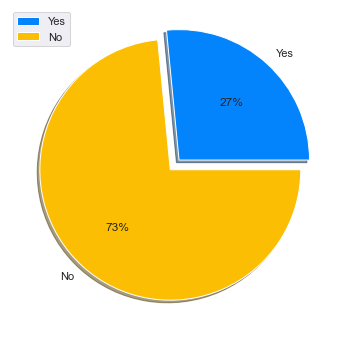

In [17]:
# Lets create a pie chart to visually display the distribution

plt.figure(figsize= (9, 6))

data = [1869, 5174]

plt.pie(data, labels= ["Yes", "No"], explode = [0.1, 0], autopct="%1.0f%%", shadow= True, colors= ['#0384fc','#fcbe03'])

plt.legend()
plt.show()

**From the chart above, we see that;**

- A very high proportion (27%) of customers have churn.

- It is vital to identify ways to reduce the churning rate or at least manage it.

- Lets explore the data more to find insights regarding the factors relating to and influencing churn.

### Predictor features

### Numerical features

In [18]:
# We will use boxplots to check the numerical features distribution against the target (Churn)

# We begin by creating a function to generate plots

def num_plots(dep_var): 
    
    # dep_var - represents the dependent variable. Input as data.column name
    
    for col in num_cols:
        
        sns.boxplot(x = dep_var, y = df[col])

        plt.title("{} Distribution".format(col))
        plt.xlabel("{}".format(dep_var.name))
        plt.ylabel("{}".format(col))
        plt.show() 

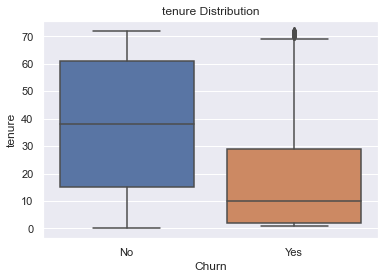

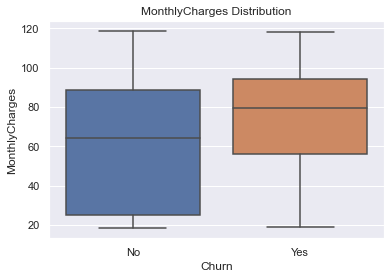

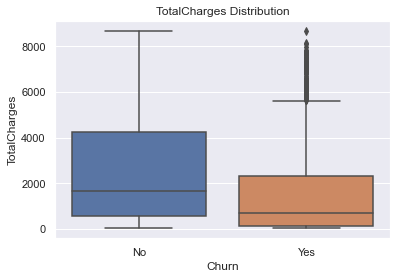

In [19]:
# Lets run the function with our data

num_plots(df.Churn)

**From the tenure distribution chart we can see that;**

- Generally, customers churn during their early stages of their interaction with the company

**From the monthlycharges distribution chart we can note that;**

- Overall, customers churn when there monthly charges are high.

**From the TotalCharges distribution chart we can note that;**

- Most customers who churn have low total charges.

In [20]:
# Lets explore more details about these numerical features

# Lets divide the data into two; 

df_churn_yes = df.loc[df['Churn'] == "Yes"]

df_churn_no = df.loc[df['Churn'] == "No"]

In [21]:
# Lets get descriptive statistics for churned customers

df_churn_yes.describe()

,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094
std,19.531123,24.666053,1890.822994
min,1.000000,18.850000,18.850000
25%,2.000000,56.150000,134.500000
50%,10.000000,79.650000,703.550000
75%,29.000000,94.200000,2331.300000
max,72.000000,118.350000,8684.800000


**From the tenure column we can see that;**

- 75% of customers start churning after the first month to 29 months.
    
- The average tenure for churning is around 18 months but median is 10 months.

  - It implies half of churned customers leave by the 10th month.

**From the monthlycharges column we can note that;**

- 75% of churning happens when the monthly charges exceed `$56` and rise upto around `$94`.
    
- The average monthly charge of those who churn is `$74` and median is `$79`.
    
**From the TotalCharges column we can note that;**

- 75% of customers churn when their total charges is between `$134` and `$2331`.

- The average total charge of those who churn is `$1532` and median is `$703`.

  - It implies half of churned customers leave during the early months thats why they have low total charges.
    
- There is a significant number of customers who churn when total charges exceed around `$5800`.
    
  
**The summary delivers useful insights which the company can use to;**

- Identify processes inefficiencies and modify them.

- Introduce new customer processes that will aid to increase retention rate.

- To dig deep to understand customers' needs.

- To gauge the company's competitiveness in the market especially in terms of charges and services it offers.

In [22]:
# Lets get descriptive statistics for customers not churned

df_churn_no.describe()

,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000
mean,37.569965,61.265124,2549.999497
std,24.113777,31.092648,2329.858843
min,0.000000,18.250000,18.800000
25%,15.000000,25.100000,572.900000
50%,38.000000,64.425000,1679.525000
75%,61.000000,88.400000,4262.850000
max,72.000000,118.750000,8672.450000


**From the tenure column we can see that;**

- Most customers who are loyal, have stayed with the compeny for a minimum of 15 months.
    
**From the monthlycharges column we can note that;**

- Most loyal customers have monthly charges between `$25` and `$88`. 
  
**From the TotalCharges column we can note that;

- Half of the customers who churn, have total charges between `$572` and `$1679`.    
   
*There is high overlap in the numerical features between the customers who stay and those who leave.*

**Analyzing more variables will aid to reduce the overlap and provide more guidance on the specific areas for the business to focus on.**

### Categorical features

In [29]:
# Lets explore the unique values for each categorical feature 

cat_values = {column: list(df[column].unique()) for column in cat_cols}

for key, value in cat_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
SeniorCitizen : ['0', '1']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No phone service', 'No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes', 'No internet service']
OnlineBackup : ['Yes', 'No', 'No internet service']
DeviceProtection : ['No', 'Yes', 'No internet service']
TechSupport : ['No', 'Yes', 'No internet service']
StreamingTV : ['No', 'Yes', 'No internet service']
StreamingMovies : ['No', 'Yes', 'No internet service']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


**From above results, we note that;**

- The internet service additional products like OnlineSecurity have a 'No' and 'No internet service' values.

- We will not combine the two values because each provides a unique description.

    - 'No' means the customer has internet service but not that specific product.

    - 'No internet service' means the customer has not subscribed to internet service.


In [30]:
# We will use bar plots to check the categorical features distribution against the target (Churn)

# First we need to delete the dependent variable (Churn) from cat_cols)

cat_cols.pop()

# Then, we create a function to generate the plots

def cat_plots(dataframe, dep_var): 
    
    for col in cat_cols:
        
        colors = ['#fcbe03','#0384fc']
        
        f = dataframe.groupby([col,dep_var]).size().unstack()
        
        ax = (f.T*100.0 / f.T.sum()).T.plot(kind='bar',
                                            width = 0.2,
                                            stacked = True,
                                            rot = 0, 
                                            figsize = (7,5),
                                            color = colors)
        
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax.legend(prop={'size':12},title = 'dep_var')
        ax.set_ylabel('% Customers')
        ax.set_title("{}".format(dep_var.name)+ ' by '+ "{}".format(col),size = 14)
        
        plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='small')
        
        # Code to add the data labels on the stacked bar chart
        
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black',
                weight = 'bold',size =12)

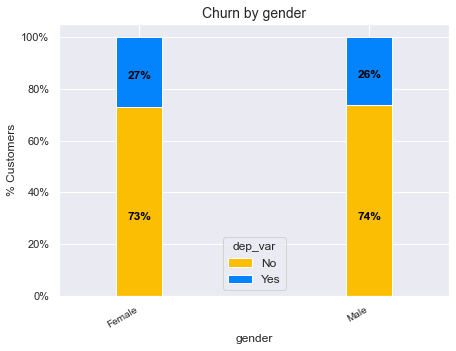

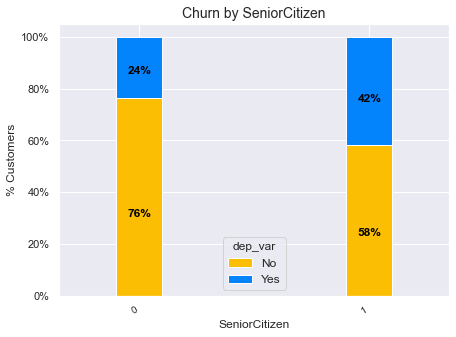

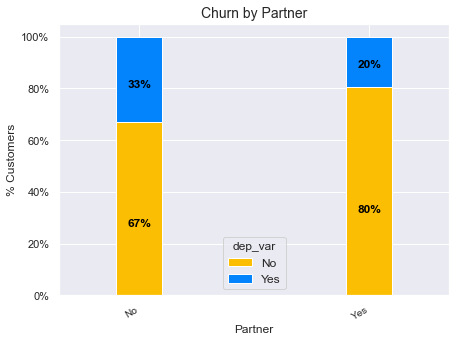

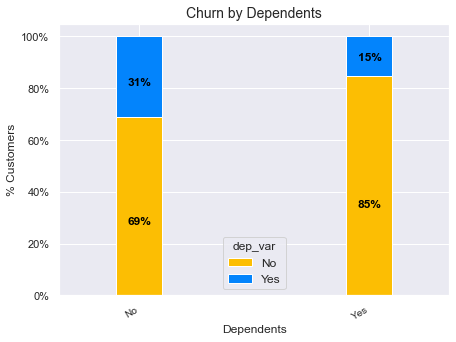

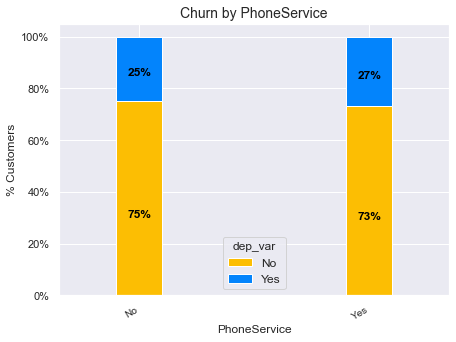

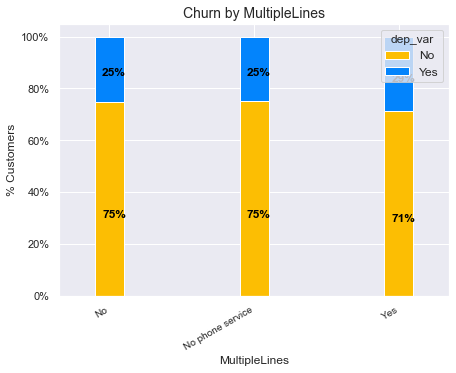

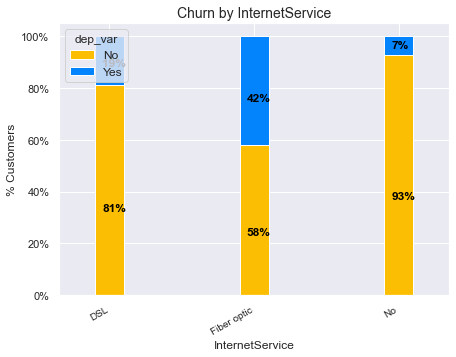

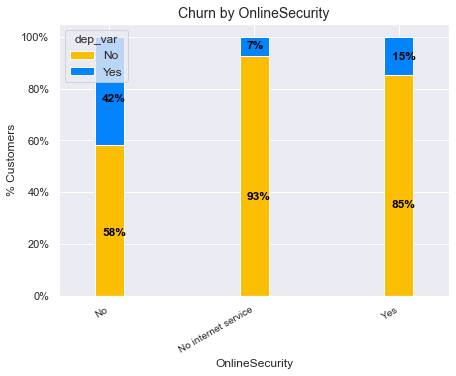

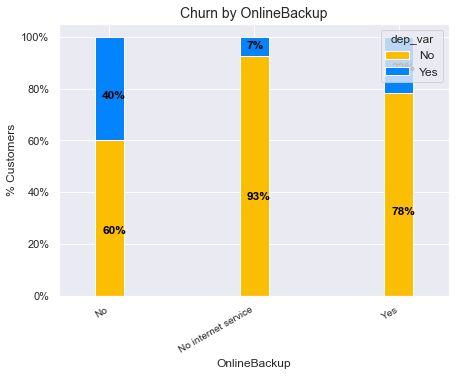

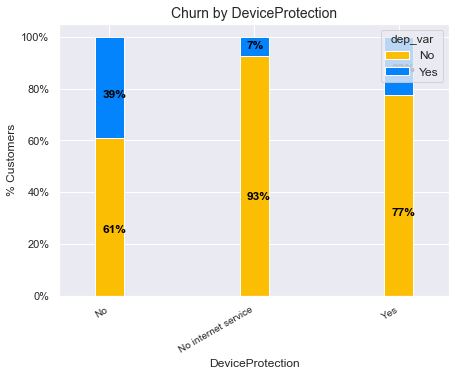

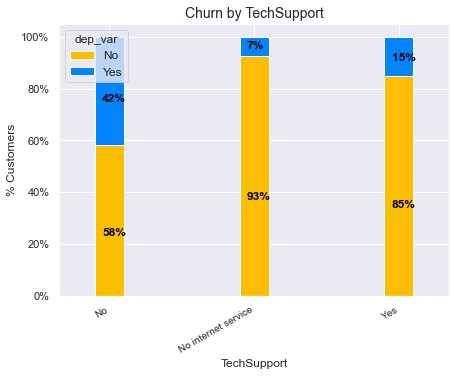

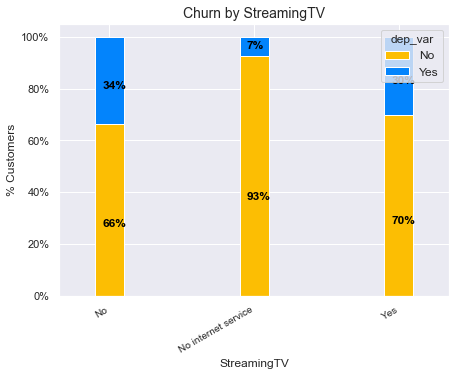

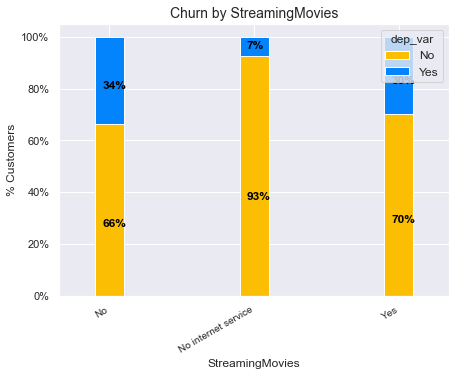

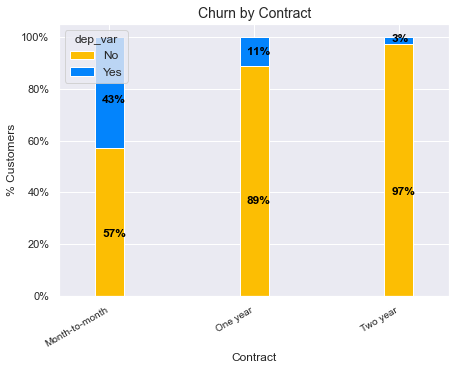

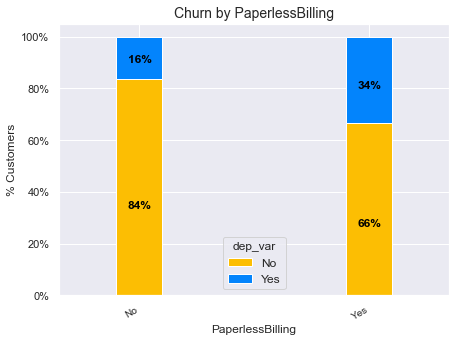

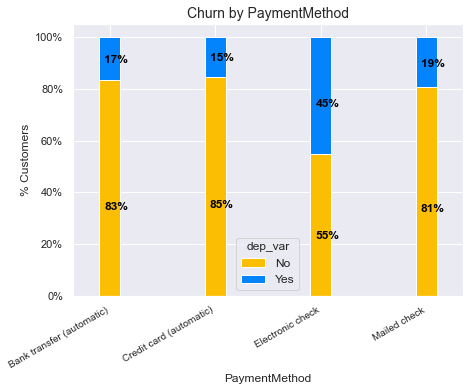

In [31]:
# We run the function with our data

cat_plots(df, df.Churn)

**From the Churn by gender graph, we note that;**

- The churn rate of female and male are almost the same at `27%` and `26%` respectively.

- Gender does not seen to influence customer churn.

**From the Churn by SeniorCitizen graph, we note that;**

- There is more churn rate `42%` on senior citizens than on non senior citizens `24%`. 

- Being a senior citizen may have an influence on customer churn.

**From the Churn by Partner graph, we note that;**

- There is more churn rate `33%` on those without partners than on customers with partners `20%`. 

- Having no partner may have an influence on customer churn.

**From the Churn by dependents graph, we note that;**

- There is more churn rate `31%` on those without dependents than on customers with dependents `15%`. 

- Having no dependents may have an influence on customer churn.

**From the Churn by PhoneService graph, we note that;**

- The churn rate of those with or without phone service is almost the same at `27%` and `25%` respectively.

- Subscribing to a phone service does not seen to influence customer churn.

**From the Churn by MultipleLines graph, we note that;**

- The churn rate of those with, without, or no phone service on multiple lines is almost the same at `29%`, `25%` and `25%` respectively.

- Subscribing to multiple lines or not and not subscribing to a phone service does not seen to influence customer churn.

**From the Churn by InternetService graph, we note that;**

- The churn rate of those with fibre optic is more at `42%`, followed by having DSL at `19%`, and lastly, not having internet service at `7%`.

- Subscribing to internet service and especially fibre optic may have an influence on customer churn.

**From the Churn by OnlineSecurity graph, we note tha44005

- The churn rate of internet subscribers without online security is highest at `42%`, followed by those who have subscribed to online security at `1%`, and finally, not having internet service at `7%`.

- Not subscribing to online security but subscribed to internet service may have an influence on customer churn.

**From the Churn by OnlineBackup graph, we note that;**

- The churn rate of internet subscribers without online backup is highest at `40%` followed by those who have subscribed to online backup at `22%` and finally, not having internet service at `7%`.

- Not subscribing to online backup but subscribed to internet service may have an influence on customer churn.

**From the Churn by DeviceProtection, we note that**

- The churn rate of internet subscribers without device protection is highest at `39%`, followed by those who have subscribed to device protection at `23%` and lastly, not having internet service at `7%`.

- Not subscribing to device protection but subcribed to internet service may have an influence on customer churn.

**From the Churn by TechSupport, we note that**

- The churn rate of internet subscribers without technical support is highest at `42%`, followed by those who have subscribed to device protection at `15%` and lastly, not having internet service at `7%`.

- Not subscribing to technical support but subcribed to internet service may have an influence on customer churn.

**From the Churn by StreamingTV, we note that**

- The churn rate of internet subscribers without streaming TV is highest at `34%`, closely followed by those who have subscribed to StreamingTV at `30%` and lastly, not having internet service at `7%`.

- Generally, internet subscribers with or without streaning TV may have an influence on customer churn.

**From the Churn by StreamingMovies, we note that**

- The churn rate of internet subscribers without streaming movies is highest at `34%`, closely followed by those who have subscribed to Streaming movies at `30%` and lastly, not having internet service at `7%`.

- Generally, internet subscribers with or without streaning movies may have an influence on customer churn.

**From the Churn by Contract, we note that**

- The churn rate of customers with month to month contracts is highest at `43%`, followed by those with one year contracts at `11%` and marginal churning for those with two year contracts at `3%`.

- Therefore, month to month contracts may have an influence on customer churn.

**From the Churn by PaperlessBilling, we note that**

- The churn rate of customers subcribed to paperless billing is highest at `34%`, while those not using paperless billing at `16%`.

- Therefore, subscribing to paperless billing may have an influence on customer churn.

**From the Churn by PaymentMethod, we note that**

- The churn rate of customers subcribed to electronic check is highest at `45%`, followed by those paying through mailed check at `19%`, then automated bank transfer at `17%`, and lastly, automatic credit card at `15%`. 

- Therefore, subscribing to electronic check may have an influence on customer churn.

**The inferences provided above are general. We need to create a model that will provide more accurate and specific analysis on the relations between the predictor factors and the target (Churn) feature.**

# Building the Model 

- Models require all variables / features to be represented in numerical format, hence we will begin by encoding the categorical features.

## Encoding Categorical Features

In [52]:
# We will use the dataframe that excludes customerID (df_new) as it is not required in building the model

# First we will convert dependent variable (Churn) to a binary numerical variable

df_new['Churn'].replace(['Yes', 'No'],[1, 0], inplace=True)

df_new['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [53]:
# Then, let's convert all the other categorical features into numerical variables excluding customerID

df_enc = pd.get_dummies(df_new)

df_enc.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [54]:
# Lets have an overview of the new data after encoding

df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   Churn                                    7043 non-null   int64  
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   SeniorCitizen_0                          7043 non-null   uint8  
 7   SeniorCitizen_1                          7043 non-null   uint8  
 8   Partner_No                               7043 non-null   uint8  
 9   Partner_Yes                              7043 non-null   uint8  
 10  Dependents_No                            7043 no

## Correlations

- Correlations aid to identify relationships between variables.

<AxesSubplot:>

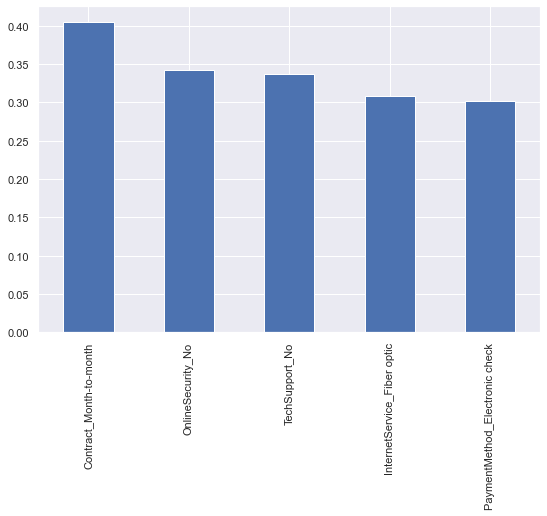

In [55]:
# Let's explore the top 5 features positively correlated to "Churn"

plt.figure(figsize=(9,6))

df_enc.corr()['Churn'].sort_values(ascending = False)[1:6].plot(kind='bar')

**From graph above, We note that;**

- The *month to month contract* is the leading positively correlated feature to churn.

- It is followed by having *no online security, no tech support, fibre optic internet service, and electronic check payment* method.

<AxesSubplot:>

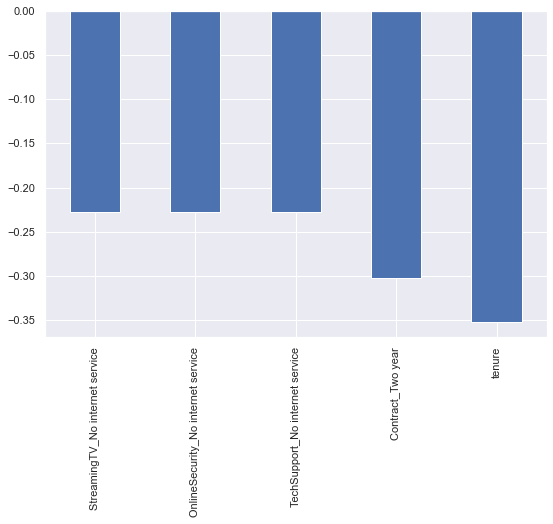

In [56]:
# Let's explore the top 5 features negatively correlated to "Churn"

plt.figure(figsize=(9,6))

df_enc.corr()['Churn'].sort_values(ascending = False)[-5:].plot(kind='bar')

**From the chart above, we observe that,**

- *Tenure* is the leading negatively correlated feature to churn. The longer the tenure period the less the possibility of churning.

- *Two year contracts* comes second. Those with two year contracts are less susceptible to churning.

- Customers *not subcribed to internet service* have low churn rate.

## Spliting the Dataset

In [58]:
# Spliting dataset into predictors (X) and target (y) variables

X = df_enc.drop(['Churn'], axis=1)

y = df_enc['Churn']

### Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

In [60]:
# Checking the split counts for the Churn outcomes

print(y_train.value_counts())
print(y_test.value_counts())

0    4139
1    1495
Name: Churn, dtype: int64
0    1035
1     374
Name: Churn, dtype: int64


## Standardization

In [61]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)

X_test_sc = sc.transform(X_test)

## Importing Modelling Libraries

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, cross_validate
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

## Model 

1. Run various models.
2. Use cross validation to evaluate best model
3. Conduct hyperparameter tuning of the best model using GridSearchCV

In [63]:
# Creation of various models for comparison and selecting best model

models = {
    'Logistic regression' : LogisticRegression(random_state=100),
    'Naive bayes' : GaussianNB(),
    'Decision trees' : DecisionTreeClassifier(random_state=100),
    'Random forest' : RandomForestClassifier(random_state=100),
    'Gradient boosing' : GradientBoostingClassifier(random_state=100),
    'Lightbgm' : LGBMClassifier(random_state=100),
    'Xgboost' : XGBClassifier(random_state=100),
    'Catboost' : CatBoostClassifier(verbose=0)
}

In [106]:
# Fitting the models and confirming trained

for name, model in models.items():    
    model.fit(X_train_sc, y_train) 

    print(f'{name} trained')

Logistic regression trained
Naive bayes trained
Decision trees trained
Random forest trained
Gradient boosing trained
Lightbgm trained
Xgboost trained
Catboost trained


### Model Evaluation

In [66]:
# Evaluating the models by applying cross validation and using roc-auc

scores = {}

kf = KFold(n_splits= 10)

for name, model in models.items():
    score = cross_val_score(model, X_train_sc, y_train, scoring= 'roc_auc', cv= kf)
    scores[name] = score

In [67]:
# Display scores for each model

for name, score in scores.items():
    print(f'{name} : {np.mean(score).round(4)}')

Logistic regression : 0.8503
Naive bayes : 0.8208
Decision trees : 0.6565
Random forest : 0.8268
Gradient boosing : 0.8533
Lightbgm : 0.8436
Xgboost : 0.8323
Catboost : 0.8482


**From the results above we realize that;**

- Gradient boosting model (GBM) performs better than the other models.

- We will use GridSearchCV for hyperparameter tuning.

### Model Hyperparameter Tuning of Best Algorithm (GBM) using GridSearchCV

In [89]:
# Setting the parameters for Hyperparameter tuning of GBM

gbm_params = {"learning_rate": [0.01, 0.1],
              'max_depth':range(5,16,2),
              'min_samples_split':range(200,801,200),
              "n_estimators": [20, 81, 10],
              "subsample": [1, 0.8, 0.6]}

kf = KFold(n_splits= 10)

gbm_model = GradientBoostingClassifier(random_state=100)

gbm_trial_grid = GridSearchCV(gbm_model, gbm_params, scoring='roc_auc',n_jobs=1, cv=kf, verbose=True)

gbm_trial_grid.fit(X_train_sc, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=100), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 801, 200),
                         'n_estimators': [20, 81, 10],
                         'subsample': [1, 0.8, 0.6]},
             scoring='roc_auc', verbose=True)

In [90]:
# We now use the best parameters to obtain the best scores for the GBM model

gbm_trial_grid.best_params_, gbm_trial_grid.best_score_

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_split': 800,
  'n_estimators': 81,
  'subsample': 1},
 0.8542035447161922)

**From the above results we notice that;**

- The tuned GBM model has a slightly higher score (`85.42%`) than the untuned model (`85.33%`).

- More tuning may assist to obtain a much better score.

- For now, we will examine the prediction accuracy of the tuned GB models, as it is our best model.


Model Report:
Accuracy : 0.7963
AUC Score (Test set): 0.826300


Text(0, 0.5, 'Feature Importance Score')

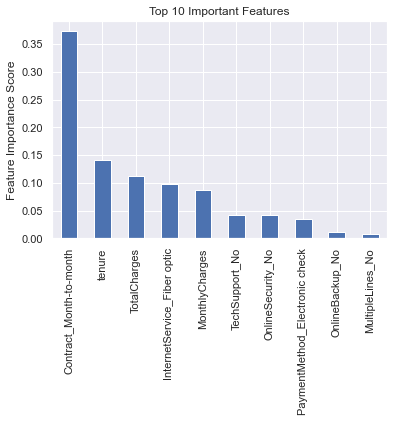

In [101]:
gbm_best_model = GradientBoostingClassifier(learning_rate=0.1, 
                                            max_depth=5, 
                                            min_samples_split=800, 
                                            n_estimators=81, 
                                            subsample=1)

gbm_best_model.fit(X_train_sc, y_train)

y_pred = gbm_best_model.predict(X_test_sc) # Computes the predicted value

y_pred_prob = gbm_best_model.predict_proba(X_test_sc)[:,1] # Computes the probability of customer churning


# Next we print the model's report

print("\nModel Report:")
print("Accuracy : %.4g" % ((accuracy_score(y_test, y_pred)).round(4)))
print("AUC Score (Test set): %f" % ((roc_auc_score(y_test, y_pred_prob)).round(4)))


# Lastly, we print the top ten most important features

imp_feat = pd.Series(gbm_best_model.feature_importances_, X_test.columns).sort_values(ascending=False)[:10]
imp_feat.plot(kind='bar', title='Top 10 Important Features')
plt.ylabel('Feature Importance Score')

**From the above results we can observe that;**

- The accuracy is `79.6%` and an AUC score of `82.6%`.

**From the feature importance graph,**

- Month to month contract is the leading factor influencing churning.
    
- The second factor is tenure, followed by total charges, fibre optic internet service and monthly charges.   


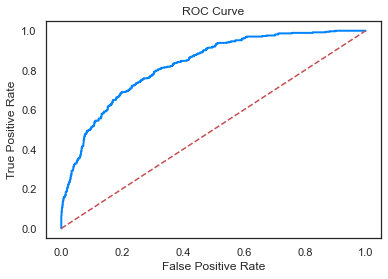

In [118]:
# Checking the ROC Curve of the model

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= '#0384fc')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

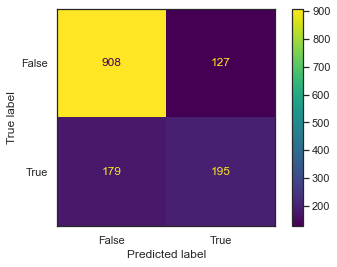

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



In [115]:
# Let's also explore the confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(classification_report(y_test,y_pred))

**From the above chart, we note that;**

- `179` cases are predicted as false and they are true.

- `127` cases are predicted as true and they are false.

- `908` cases are correctly predicted as false.

- `195` cases are correctly predicted as true.

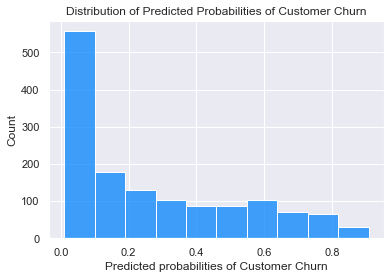

In [107]:
# Let's explore the distribution of the predicted probabilities

sns.histplot(y_pred_prob, bins= 10, color= '#0384fc')
plt.title('Distribution of Predicted Probabilities of Customer Churn')
plt.xlabel('Predicted probabilities of Customer Churn')
plt.show()

In [116]:
# In order to take appropriate action we need to combine our predicted values to original data.

predictions = pd.DataFrame({'Customer Churn Prediction': y_pred, 'Probability of Customer Churning': y_pred_prob})
predictions.head()

,Customer Churn Prediction,Probability of Customer Churning
0,0,0.055956
1,0,0.203464
2,1,0.624763
3,0,0.077904
4,0,0.048392


In [117]:
# Lets combine the predictions to the original dataframe

final_df = pd.concat([df.reset_index(drop = True), predictions], axis = 1)

final_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Churn Prediction,Probability of Customer Churning
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.0,0.055956
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0.0,0.203464
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1.0,0.624763
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.0,0.077904
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.0,0.048392


### Project Summary

- Combining the discoveries observed in the descriptive statistics section, the correlations section, and finally,the modeling section provides the company with insightful guidelines on which features to focus on to reduce or manage the churn rate.